In [5]:
import pandas as pd
import os
import shutil
from tqdm import tqdm
from sklearn.model_selection import GroupShuffleSplit 
from PIL import Image
import torch
import torchvision.transforms as T
from torchvision.io import read_image
from torchvision.utils import save_image
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [6]:
updated_data_dir = "C:\\Users\Maedr3\Downloads\ChestXRay8"
updated_labels = pd.read_csv(os.path.join(updated_data_dir,'train_df.csv'))

In [7]:
updated_labels.columns

Index(['Image Index', 'Patient ID', 'Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation', 'FilePath'],
      dtype='object')

In [36]:
updated_labels[['Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']].sum().sort_values()

Hernia                  227
Pneumonia              1429
Fibrosis               1683
Edema                  2296
Emphysema              2511
Cardiomegaly           2775
Pleural_Thickening     3379
Consolidation          4660
Pneumothorax           5293
Mass                   5772
Nodule                 6318
Atelectasis           11543
Effusion              13287
Infiltration          19869
No Finding            60190
dtype: int64

In [25]:
frac_labels = (updated_labels[['Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']].sum()/updated_labels.shape[0]).to_dict()

In [26]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

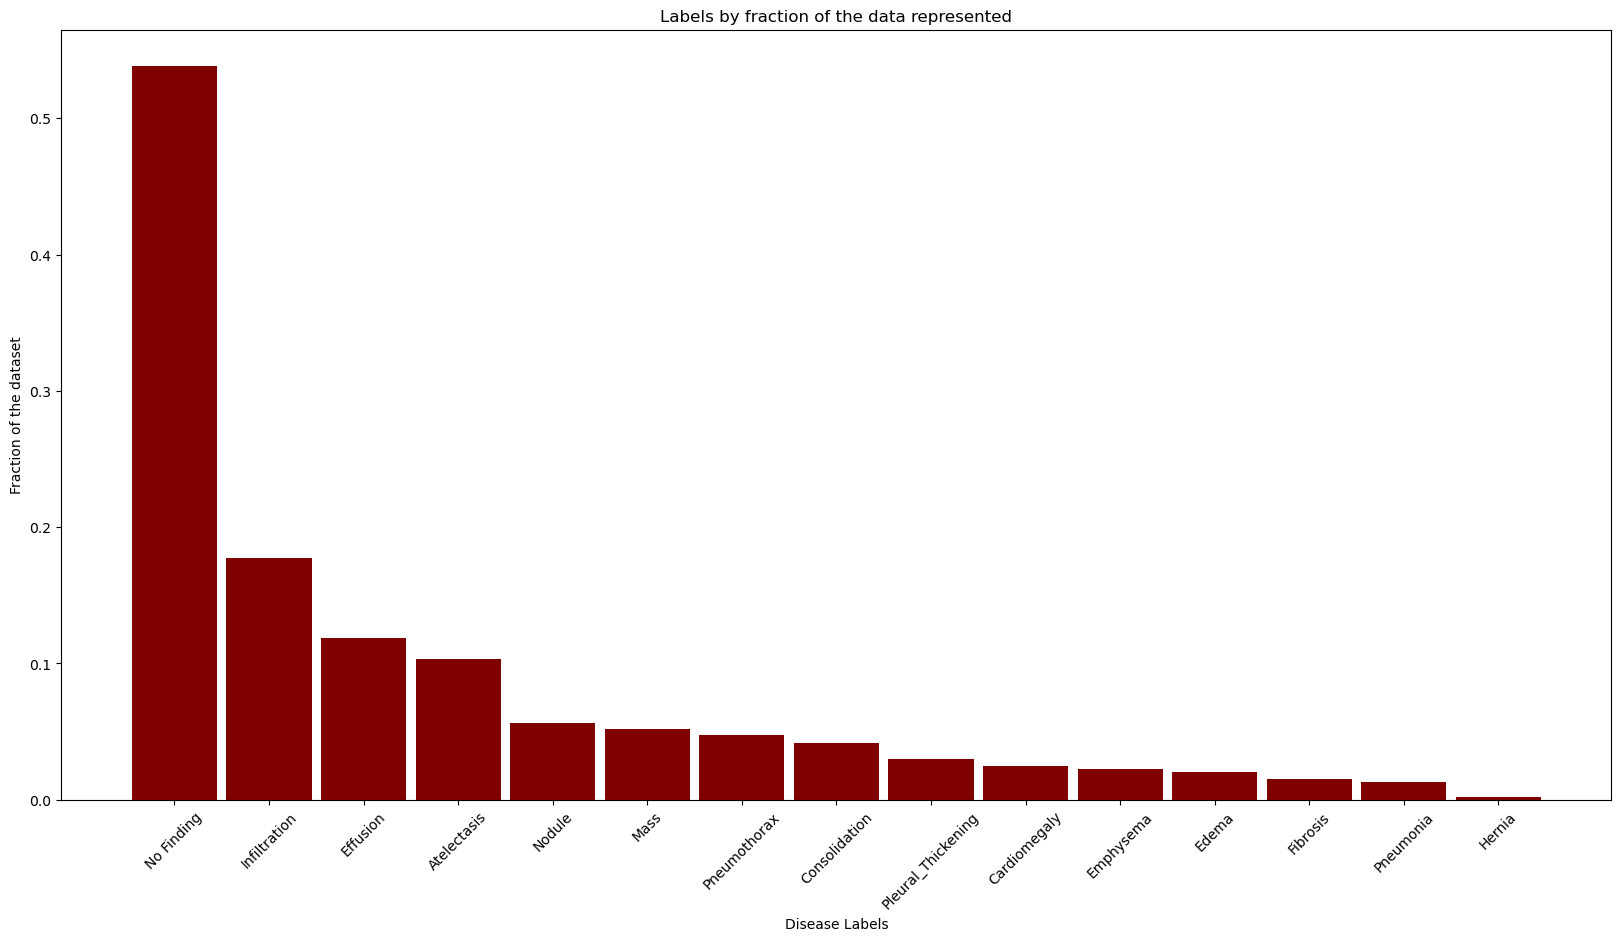

In [34]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing No finding as it is not multilabel
- Removing hernia as it has the lowest cases

In [42]:
labels = updated_labels[['Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']]

In [47]:
labels = labels.loc[labels['No Finding'] != 1]

In [50]:
labels = labels.loc[labels['Hernia'] != 1]

In [54]:
labels = labels.drop(['Hernia', 'No Finding'], axis=1)

In [55]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [56]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

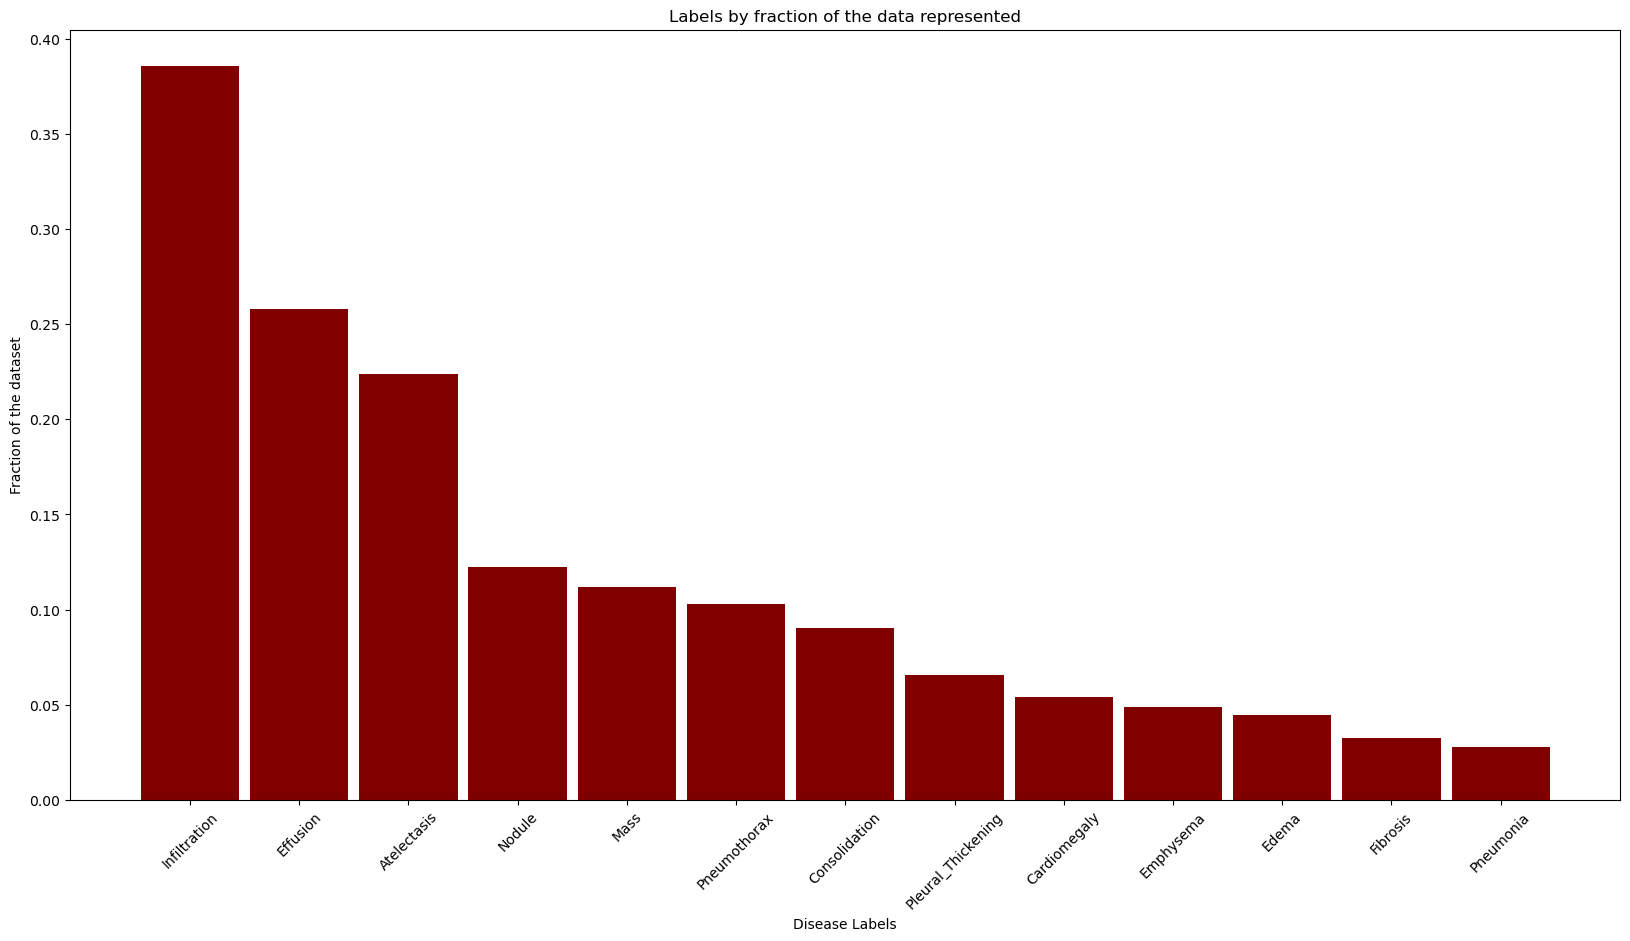

In [57]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing Infiltration

In [59]:
labels = labels.loc[labels['Infiltration'] != 1]

In [60]:
labels = labels.drop(['Infiltration'], axis=1)

In [61]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [62]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

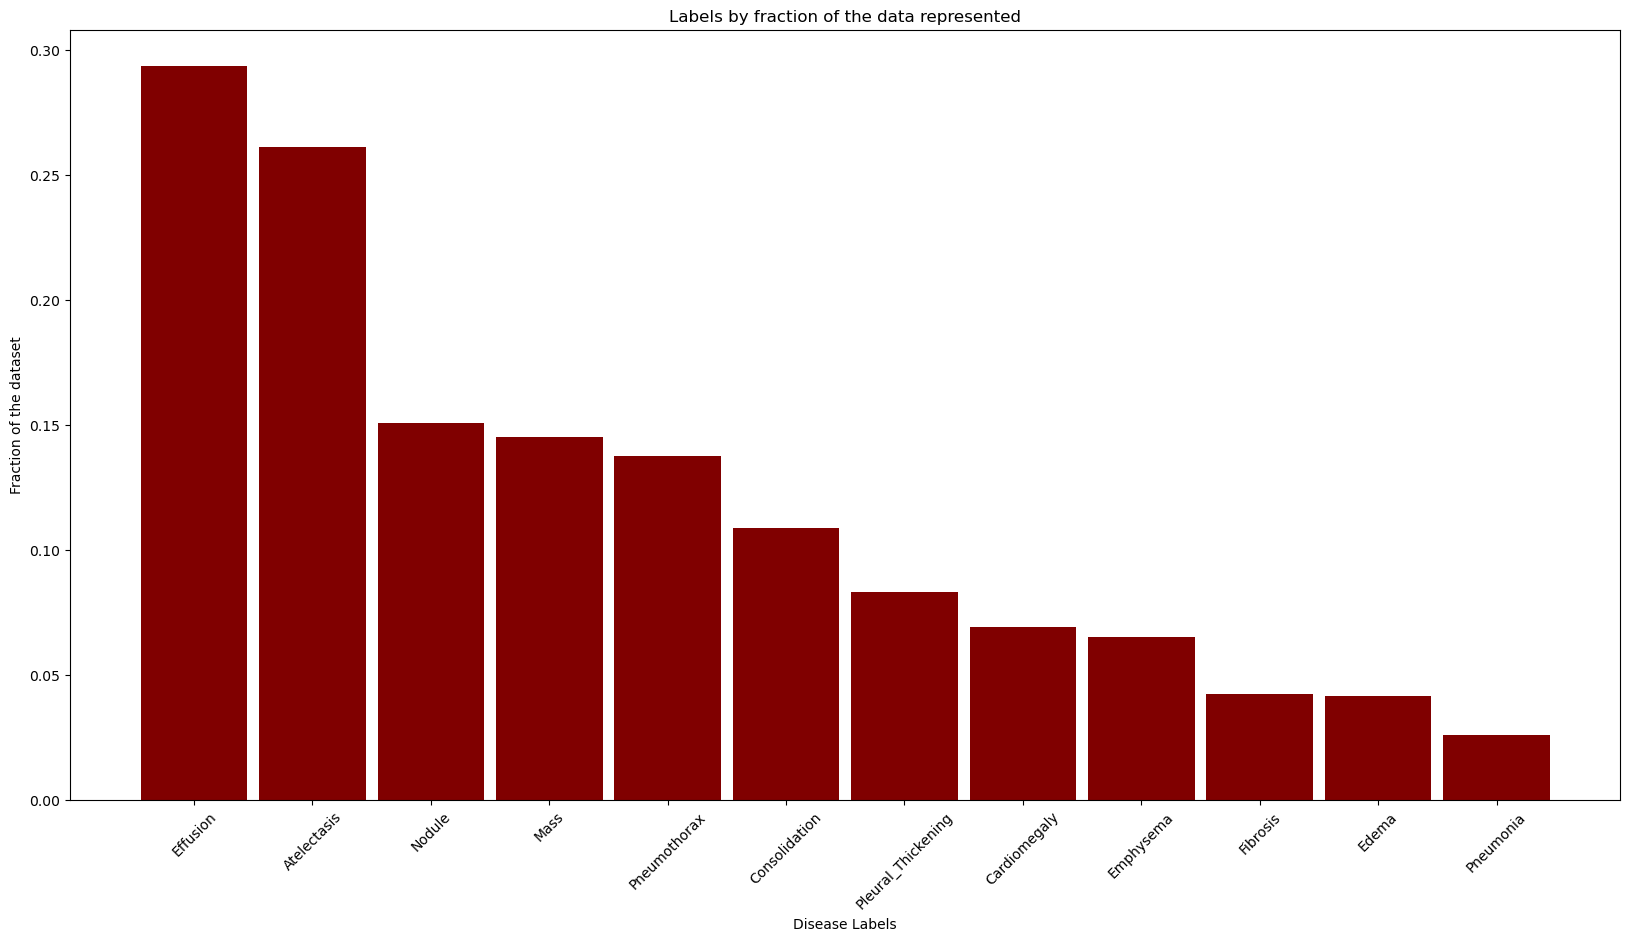

In [63]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing Pneumonia

In [65]:
labels = labels.loc[labels['Pneumonia'] != 1]

In [66]:
labels = labels.drop(['Pneumonia'], axis=1)

In [67]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [68]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

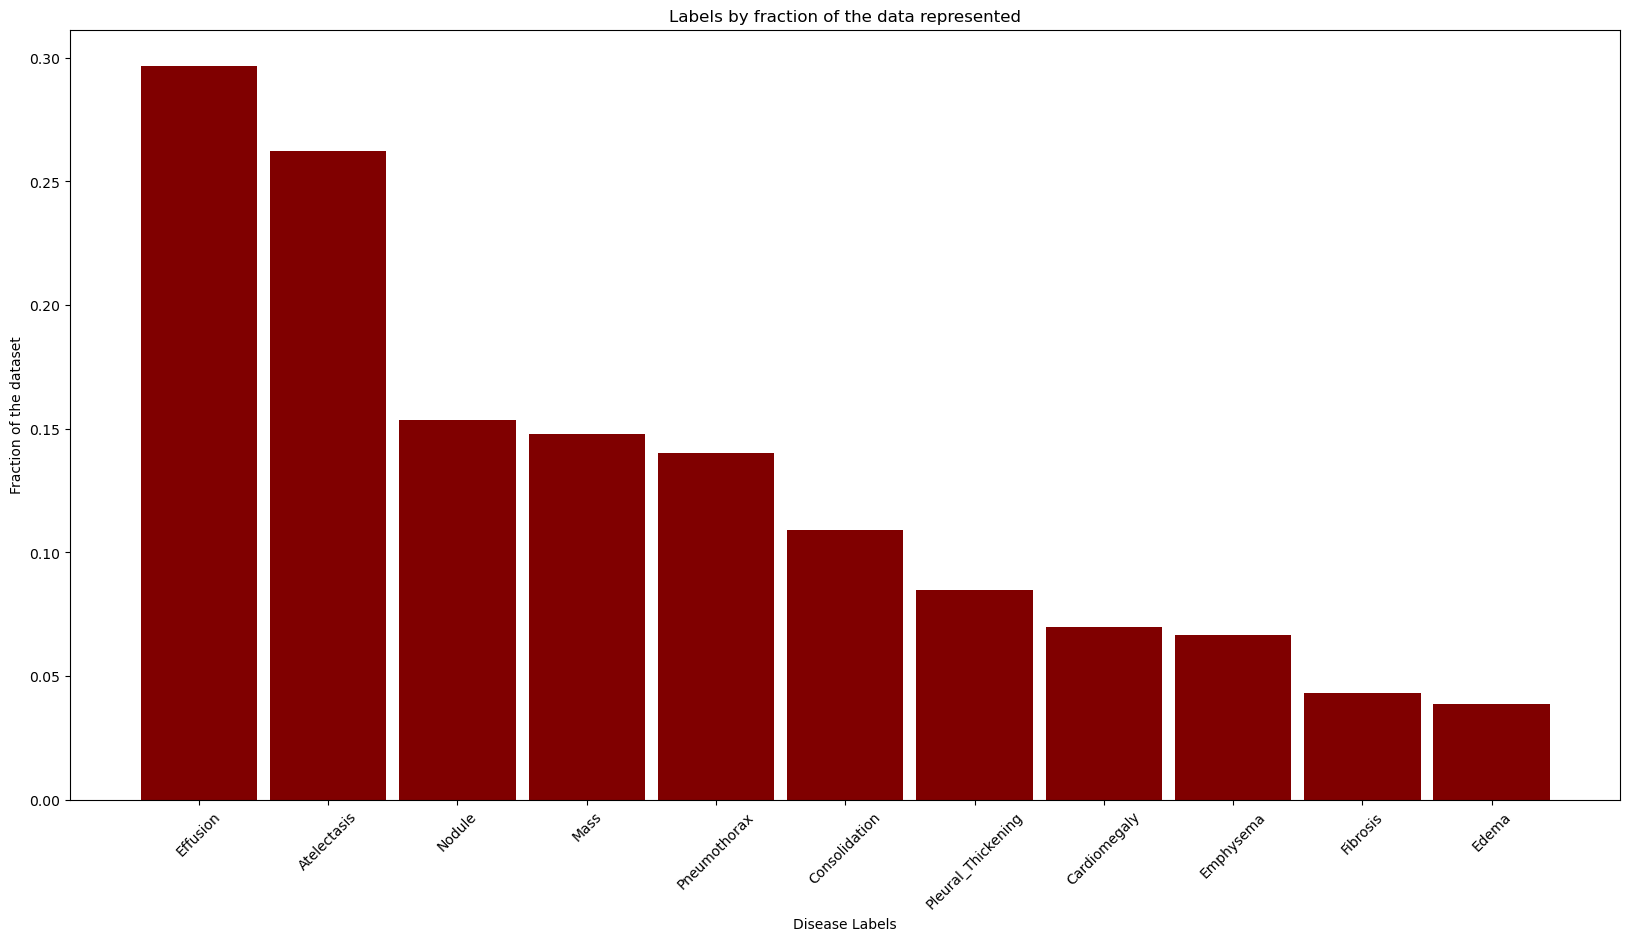

In [69]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing Fibrosis and Edema

In [70]:
labels = labels.loc[labels['Fibrosis'] != 1]
labels = labels.loc[labels['Edema'] != 1]

In [71]:
labels = labels.drop(['Fibrosis', 'Edema'], axis=1)

In [72]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [73]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

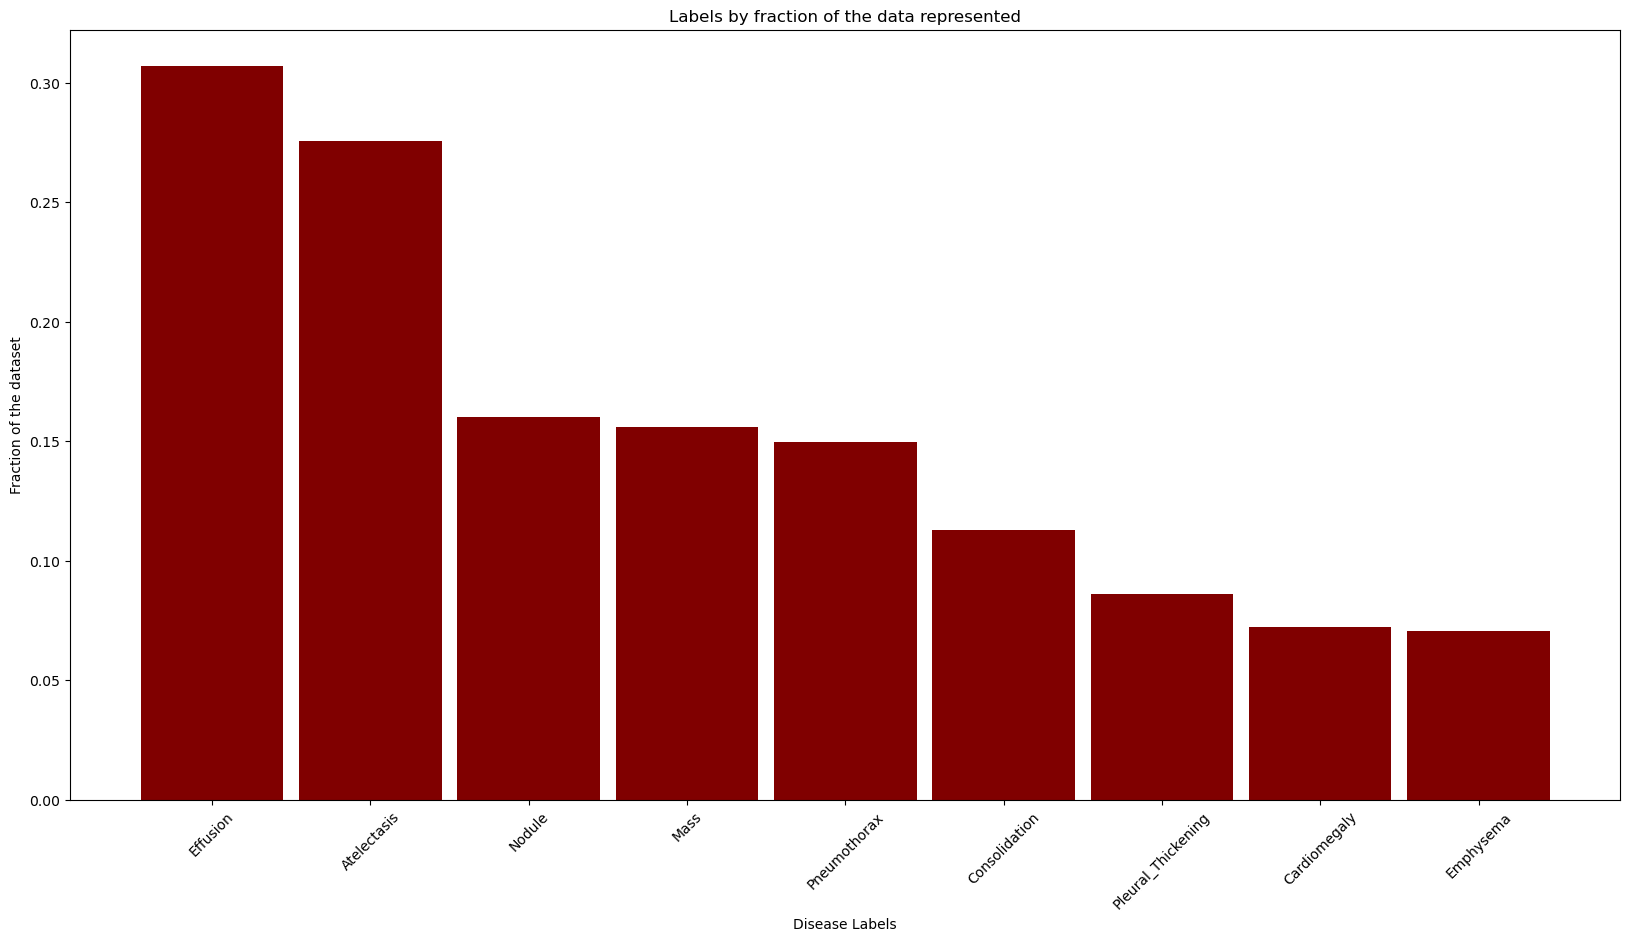

In [74]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing Effusion

In [75]:
labels = labels.loc[labels['Effusion'] != 1]

In [76]:
labels = labels.drop(['Effusion'], axis=1)

In [77]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [78]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

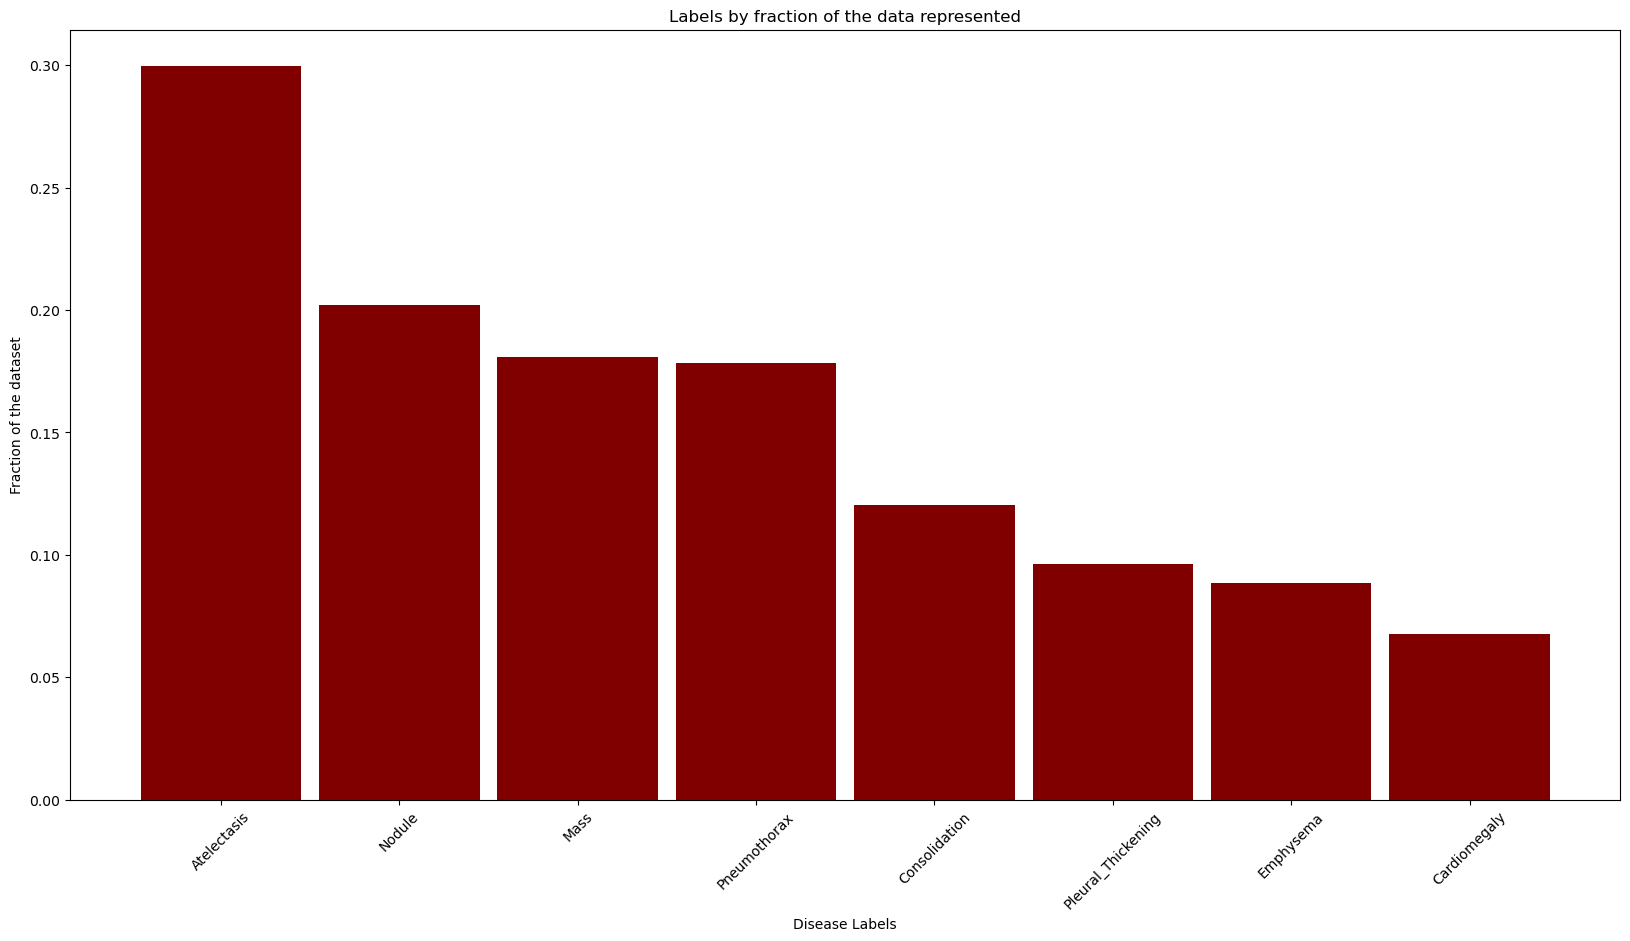

In [79]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing Atelectasis

In [80]:
labels = labels.loc[labels['Atelectasis'] != 1]

In [81]:
labels = labels.drop(['Atelectasis'], axis=1)

In [82]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [83]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

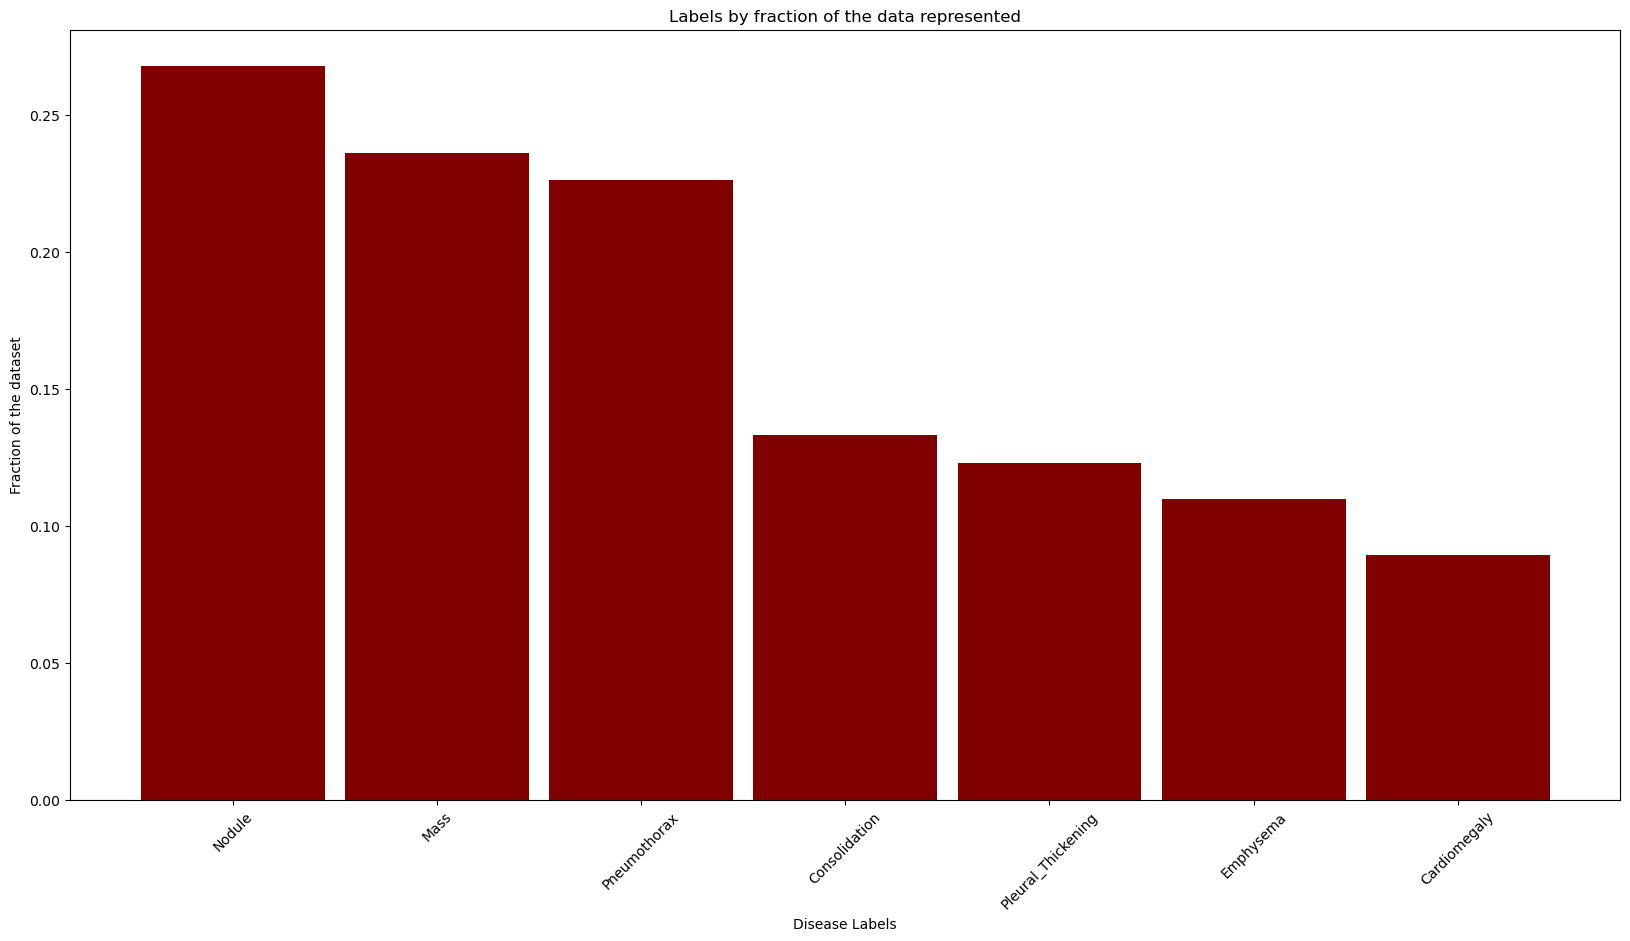

In [84]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

- Removing Cardiomegaly

In [86]:
labels = labels.loc[labels['Cardiomegaly'] != 1]

In [87]:
labels = labels.drop(['Cardiomegaly'], axis=1)

In [88]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [89]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

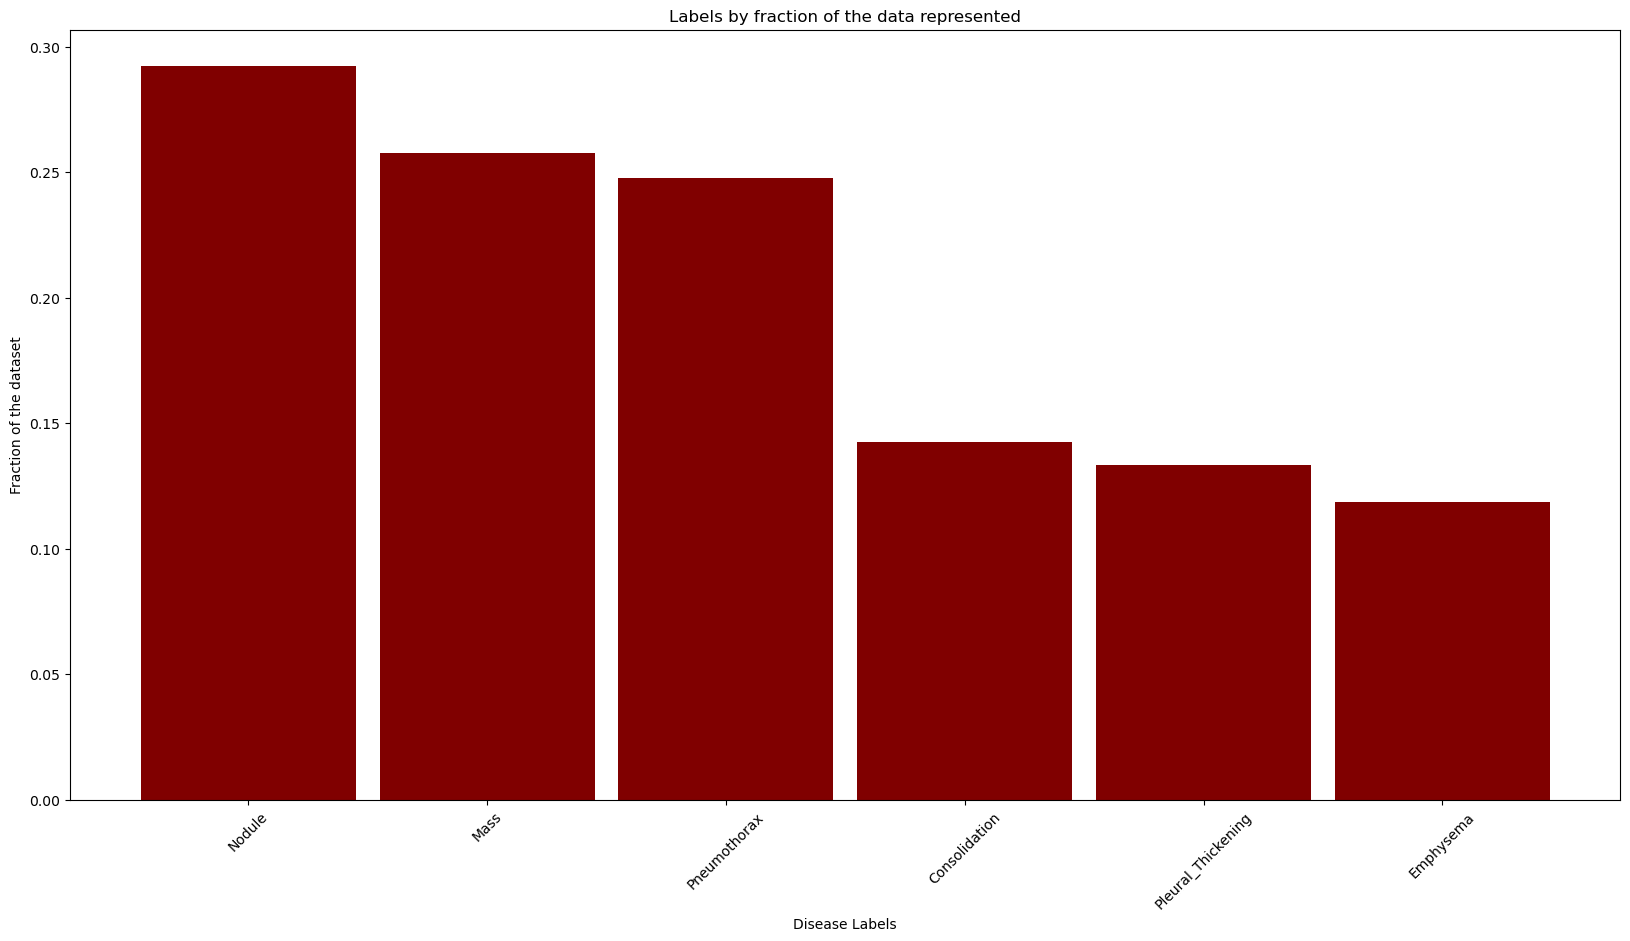

In [90]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

In [85]:
labels.sum()

Cardiomegaly          1226
Emphysema             1507
Mass                  3244
Nodule                3676
Pneumothorax          3106
Pleural_Thickening    1686
Consolidation         1826
dtype: int64

In [92]:
100 * labels.sum()/labels.shape[0]

Emphysema             11.877149
Mass                  25.761817
Nodule                29.208990
Pneumothorax          24.746061
Pleural_Thickening    13.332800
Consolidation         14.244581
dtype: float64

In [93]:
labels.sum()

Emphysema             1485
Mass                  3221
Nodule                3652
Pneumothorax          3094
Pleural_Thickening    1667
Consolidation         1781
dtype: int64

In [164]:
labels = updated_labels[['Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']]

In [165]:
labels = labels.loc[labels['No Finding'] != 1]
labels = labels.loc[labels['Hernia'] != 1]
labels = labels.loc[labels['Pneumonia'] != 1]
labels = labels.loc[labels['Fibrosis'] != 1]
labels = labels.loc[labels['Edema'] != 1]
labels = labels.loc[labels['Emphysema'] != 1]
labels = labels.loc[labels['Cardiomegaly'] != 1]
labels = labels.loc[labels['Pleural_Thickening'] != 1]
labels = labels.loc[labels['Infiltration'] != 1]

In [166]:
labels = labels.drop(['Hernia', 'No Finding', 'Pneumonia', 'Fibrosis',
                      'Edema', 'Emphysema', 'Cardiomegaly', 'Pleural_Thickening',
                      'Infiltration'], axis=1)

In [167]:
frac_labels = (labels.sum()/labels.shape[0]).to_dict()

In [168]:
frac_labels = dict(sorted(frac_labels.items(), key=lambda x: x[1], reverse=True))

In [169]:
frac_labels

{'Effusion': 0.32889897843359817,
 'Atelectasis': 0.3191827468785471,
 'Nodule': 0.1872871736662883,
 'Mass': 0.1767082860385925,
 'Pneumothorax': 0.15745743473325766,
 'Consolidation': 0.13098751418842225}

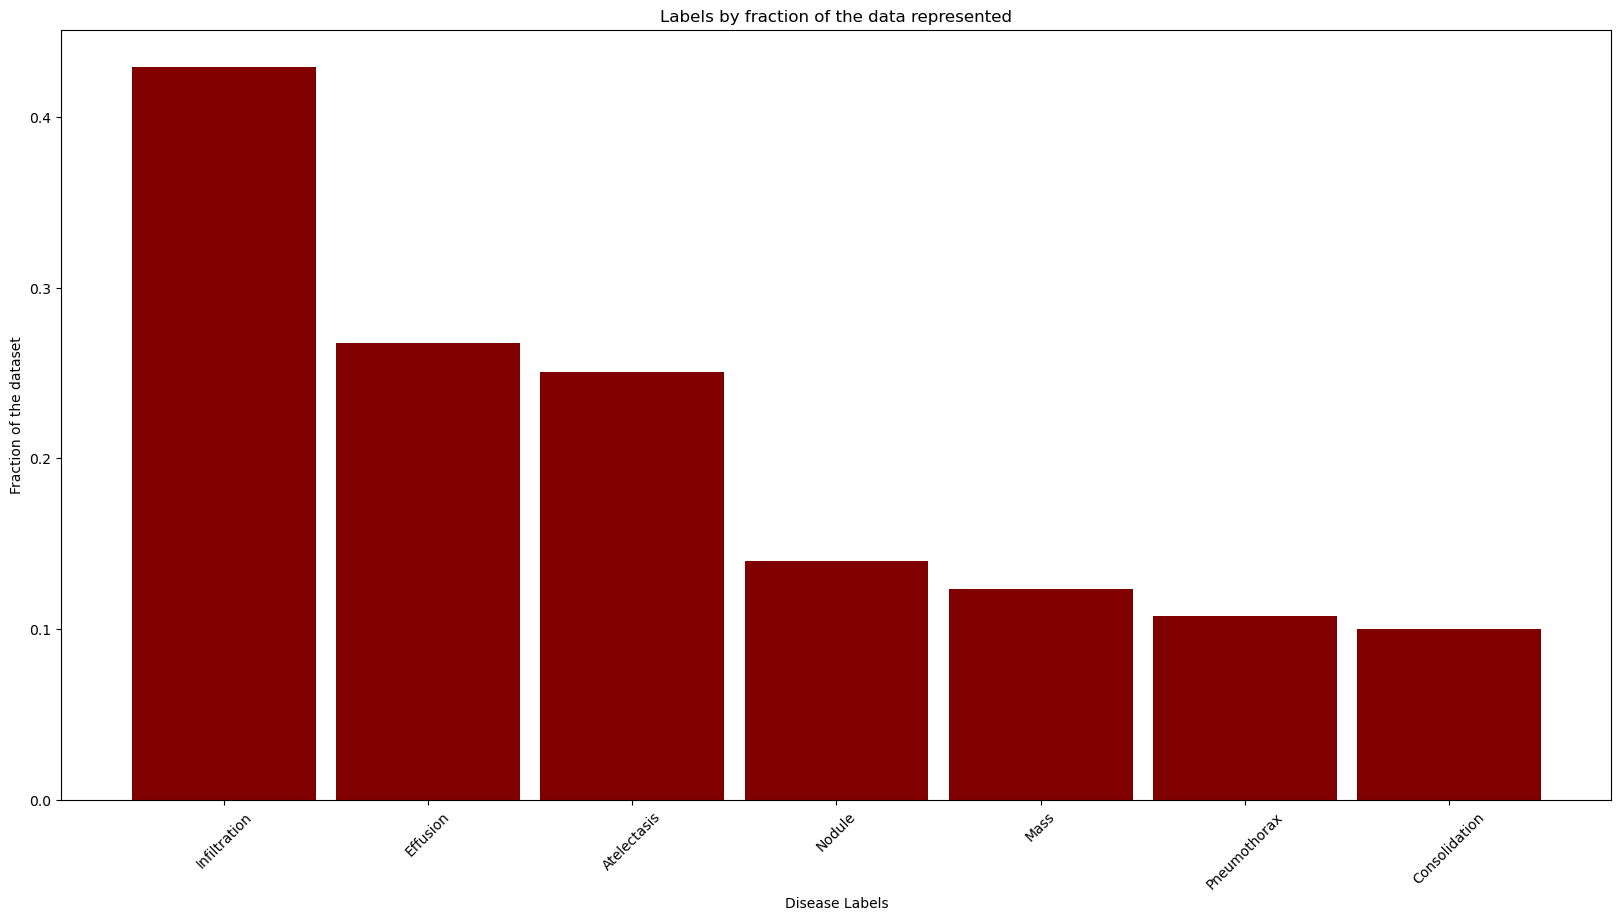

In [163]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

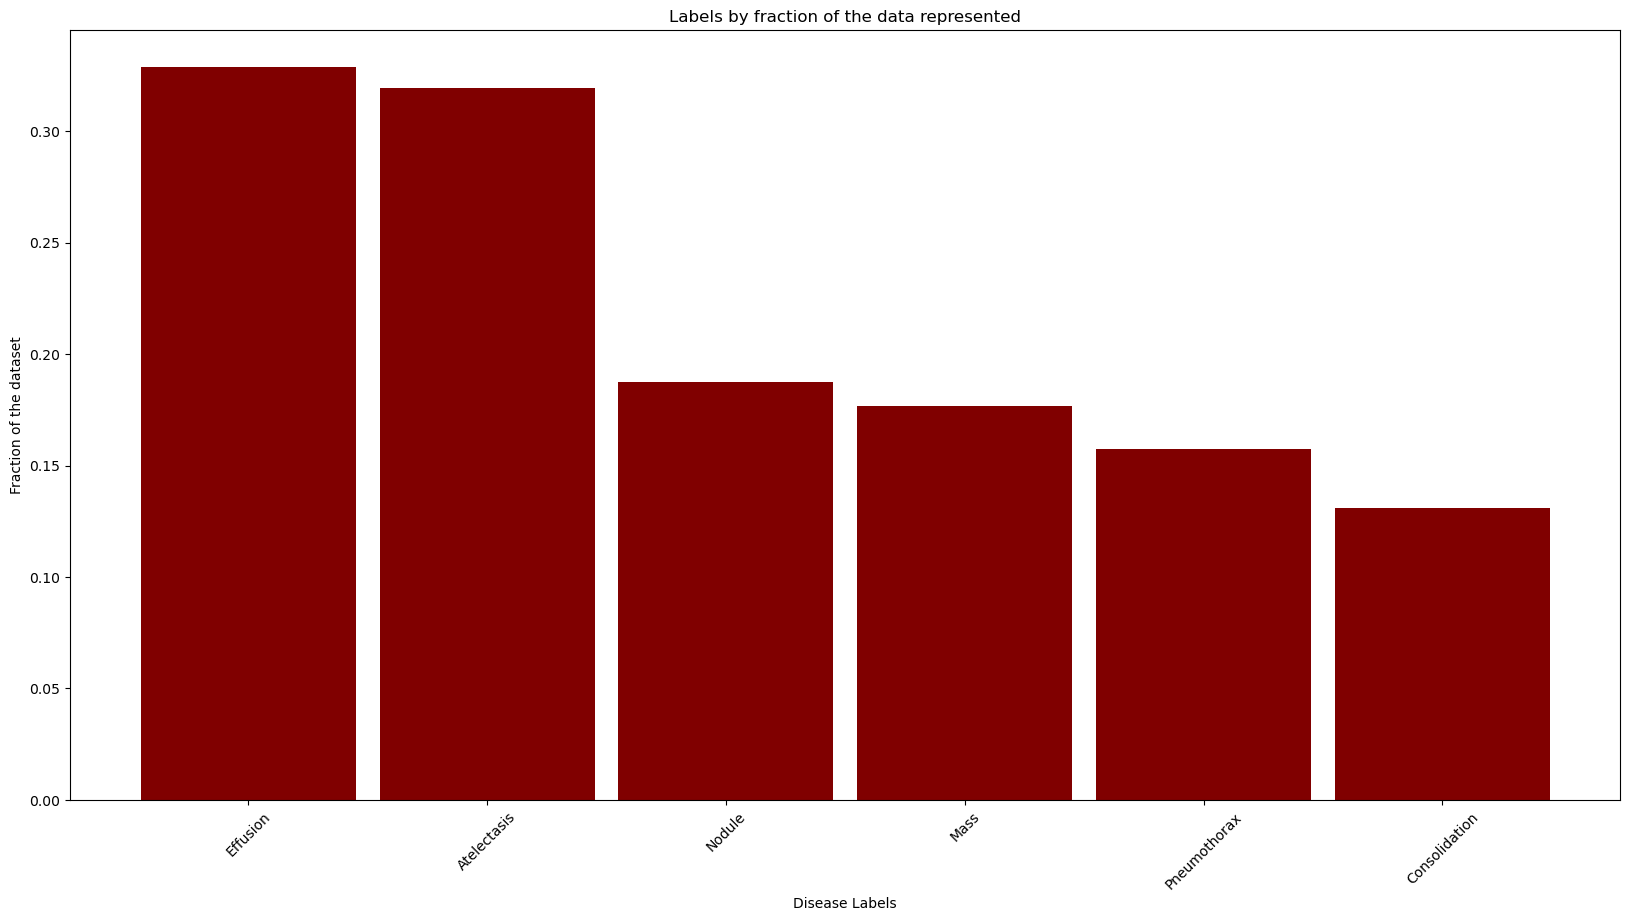

In [156]:
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
plt.bar(frac_labels.keys(), frac_labels.values(), color ='maroon',
        width = 0.9)
 
plt.xlabel("Disease Labels")
plt.ylabel("Fraction of the dataset")
plt.title("Labels by fraction of the data represented")
plt.xticks(rotation=45)
plt.show()

In [154]:
labels.sum().sort_values()

Consolidation    2885
Pneumothorax     3468
Mass             3892
Nodule           4125
Atelectasis      7030
Effusion         7244
dtype: int64

In [144]:
labels.sum().sort_values()

Consolidation     3860
Pneumothorax      4154
Mass              4778
Nodule            5408
Atelectasis       9683
Effusion         10327
Infiltration     16582
dtype: int64

In [175]:
data = updated_labels.copy()
data = data.loc[data['Hernia'] != 1]
data = data.loc[data['Pneumonia'] != 1]
data = data.loc[data['Fibrosis'] != 1]
data = data.loc[data['Edema'] != 1]
data = data.loc[data['Emphysema'] != 1]
data = data.loc[data['Cardiomegaly'] != 1]
data = data.loc[data['Pleural_Thickening'] != 1]
data = data.loc[data['Infiltration'] != 1]

In [176]:
data

,Image Index,Patient ID,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,FilePath
3,00000002_000.png,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000002_000.png
12,00000004_000.png,4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,../input/data/images_001/images/00000004_000.png
13,00000005_000.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_000.png
14,00000005_001.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_001.png
15,00000005_002.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_002.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111857,00030801_000.png,30801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030801_000.png
111859,00030802_000.png,30802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030802_000.png
111860,00030803_000.png,30803,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030803_000.png
111861,00030804_000.png,30804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030804_000.png


,Image Index,Patient ID,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,FilePath
3,00000002_000.png,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000002_000.png
13,00000005_000.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_000.png
14,00000005_001.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_001.png
15,00000005_002.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_002.png
16,00000005_003.png,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000005_003.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111857,00030801_000.png,30801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030801_000.png
111859,00030802_000.png,30802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030802_000.png
111860,00030803_000.png,30803,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030803_000.png
111861,00030804_000.png,30804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030804_000.png


In [181]:
base_class = data.loc[data['No Finding'] == 1].reset_index(drop=True)
other_classes = data.loc[data['No Finding'] != 1].reset_index(drop=True)

In [187]:
base_sample = base_class.groupby(['Patient ID'])['FilePath'].sample(1).values

In [190]:
base_class = base_class.loc[base_class.FilePath.isin(base_sample)].sample(7000)

In [191]:
data = pd.concat([base_class, other_classes], ignore_index=1)

In [192]:
data

,Image Index,Patient ID,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,FilePath
0,00017638_000.png,17638,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_008/images/00017638_000.png
1,00017464_000.png,17464,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_008/images/00017464_000.png
2,00011258_000.png,11258,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_005/images/00011258_000.png
3,00006375_003.png,6375,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_003/images/00006375_003.png
4,00015580_000.png,15580,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_007/images/00015580_000.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29020,00030774_000.png,30774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,../input/data/images_012/images/00030774_000.png
29021,00030780_000.png,30780,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,../input/data/images_012/images/00030780_000.png
29022,00030786_000.png,30786,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_012/images/00030786_000.png
29023,00030786_006.png,30786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,../input/data/images_012/images/00030786_006.png


Split data into train, val and test sets by patient ID

In [194]:
random_state = 30
splitter = GroupShuffleSplit(test_size=.30, n_splits=1, random_state = random_state)
split = splitter.split(data, groups=data['Patient ID'])
train_inds, test_inds = next(split)

labels_test_val = data.iloc[test_inds]

splitter = GroupShuffleSplit(test_size=.50, n_splits=1, random_state = random_state)
split = splitter.split(labels_test_val, groups=labels_test_val['Patient ID'])
val_inds, test_inds = next(split)

In [195]:
train = data.iloc[train_inds].reset_index(drop=True)
val = labels_test_val.iloc[val_inds].reset_index(drop=True)
test = labels_test_val.iloc[test_inds].reset_index(drop=True)

In [196]:
total = train.shape[0] + val.shape[0] + test.shape[0]
print((train.shape[0])/total)
print(val.shape[0]/total)
print(test.shape[0]/total)

0.7045650301464255
0.14666666666666667
0.14876830318690784


Check for data leak

In [197]:
def check_data_leak(train, test):
    return set(train['Patient ID']).intersection(set(test['Patient ID']))

In [198]:
print(check_data_leak(data.iloc[train_inds], labels_test_val.iloc[test_inds]))
print(check_data_leak(data.iloc[train_inds], labels_test_val.iloc[val_inds]))
print(check_data_leak(labels_test_val.iloc[val_inds], labels_test_val.iloc[test_inds]))

set()
set()
set()


In [201]:
train['FilePath'] = train['FilePath'].str[14:]
val['FilePath'] = val['FilePath'].str[14:]
test['FilePath'] = test['FilePath'].str[14:]

In [204]:
train.to_csv("../../data/xray8/train.csv", index=False)
val.to_csv("../../data/xray8/val.csv", index=False)
test.to_csv("../../data/xray8/test.csv", index=False)

In [208]:
for idx, row in tqdm(test.iterrows()):
    im = read_image(os.path.join(updated_data_dir, row.FilePath), mode=torchvision.io.ImageReadMode.GRAY)
    im = T.functional.equalize(im)
    im = T.functional.gaussian_blur(im, kernel_size=(5, 5), sigma=None)
    im = T.Resize(size=(384))(im)
    save_image(im/255., f"../../data/xray8/test/{row.FilePath.split('/')[-1]}")

4318it [09:09,  7.85it/s]


In [209]:
for idx, row in tqdm(val.iterrows()):
    im = read_image(os.path.join(updated_data_dir, row.FilePath), mode=torchvision.io.ImageReadMode.GRAY)
    im = T.functional.equalize(im)
    im = T.functional.gaussian_blur(im, kernel_size=(5, 5), sigma=None)
    im = T.Resize(size=(384))(im)
    save_image(im/255., f"../../data/xray8/val/{row.FilePath.split('/')[-1]}")

4257it [08:58,  7.91it/s]


In [210]:
for idx, row in tqdm(train.iterrows()):
    im = read_image(os.path.join(updated_data_dir, row.FilePath), mode=torchvision.io.ImageReadMode.GRAY)
    im = T.functional.equalize(im)
    im = T.functional.gaussian_blur(im, kernel_size=(5, 5), sigma=None)
    im = T.Resize(size=(384))(im)
    save_image(im/255., f"../../data/xray8/train/{row.FilePath.split('/')[-1]}")

20450it [44:03,  7.74it/s]


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("../../data/xray8/train.csv")
val = pd.read_csv("../../data/xray8/val.csv")
test = pd.read_csv("../../data/xray8/test.csv")

In [7]:
train[['Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']].sum()

Cardiomegaly             0
Emphysema                0
Effusion              5158
No Finding            4896
Hernia                   0
Infiltration             0
Mass                  2771
Nodule                2857
Atelectasis           4974
Pneumothorax          2502
Pleural_Thickening       0
Pneumonia                0
Fibrosis                 0
Edema                    0
Consolidation         2028
dtype: int64

In [11]:
drop_cols = ['Cardiomegaly', 'Emphysema', 'Hernia','Infiltration', 
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)
val = val.drop(drop_cols, axis=1)

In [12]:
train.to_csv("../../data/xray8/train.csv", index=False)
val.to_csv("../../data/xray8/val.csv", index=False)
test.to_csv("../../data/xray8/test.csv", index=False)

In [174]:
for idx, row in tqdm(test.iterrows()):
    shutil.copy2(row.FilePath, f"base/test/{row.label}/") # target filename is /dst/dir/file.ext

8398it [00:38, 218.99it/s]


In [175]:
for idx, row in tqdm(val.iterrows()):
    shutil.copy2(row.FilePath, f"base/val/{row.label}/") # target filename is /dst/dir/file.ext

8499it [00:27, 306.64it/s]


In [176]:
for idx, row in tqdm(train.iterrows()):
    shutil.copy2(row.FilePath, f"base/train/{row.label}/") # target filename is /dst/dir/file.ext

39061it [02:39, 244.62it/s]


In [19]:
train.shape[0] + test.shape[0] + val.shape[0]

29025

In [13]:
test.shape

(4318, 18)

In [14]:
val.shape

(4257, 18)

In [11]:
pd.concat([train, test, val], ignore_index=True)[['Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']].sum()

Cardiomegaly             0
Emphysema                0
Effusion              7244
No Finding            7000
Hernia                   0
Infiltration             0
Mass                  3892
Nodule                4125
Atelectasis           7030
Pneumothorax          3468
Pleural_Thickening       0
Pneumonia                0
Fibrosis                 0
Edema                    0
Consolidation         2885
dtype: int64